In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display
import warnings
warnings.simplefilter('ignore') # MatplotlibDeprecationWarning
%matplotlib inline

Input sounds
-----------------

In [2]:
filename1 = './input/tuba2.wav'
filename2 = './input/trumpet2.wav'

y1, sr = librosa.load(filename1)
y2, _ = librosa.load(filename2)

y1 = np.append(y1[:len(y1)//2], np.zeros(len(y1)//2))

tmp = np.append(np.zeros(len(y2)//4), y2[:len(y2)//2])
y2 = np.append(tmp, np.zeros(len(y2)//4))

y =( y1 + y2)[:22050*15 // 10]

In [3]:
IPython.display.Audio(data=y, rate=sr)

Plot wave
------------

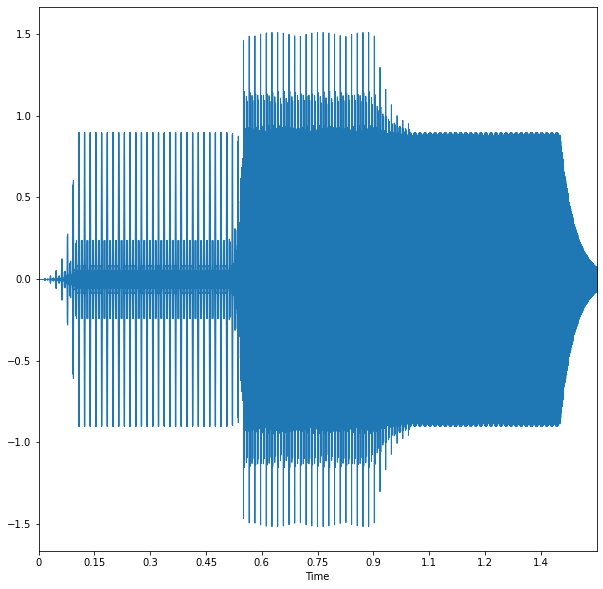

In [4]:
plt.figure(figsize=(10,10))
librosa.display.waveplot(y, sr=sr)
plt.xlabel('Time')
plt.show()

Plot spectrogram
----------------------

In [5]:
D = np.abs(librosa.stft(y))
log_D = librosa.amplitude_to_db(D, ref=np.max)

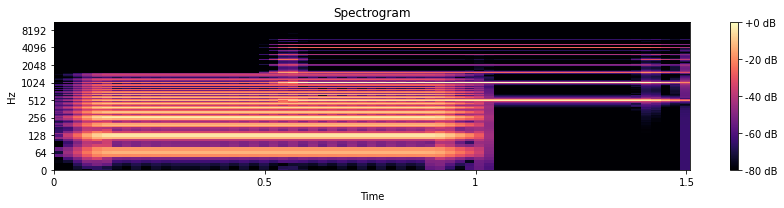

In [6]:
plt.figure(figsize=(12,3))
librosa.display.specshow(log_D, x_axis='time', y_axis='log') 
plt.title('Spectrogram') 
plt.colorbar(format='%+02.0f dB') 
plt.tight_layout() 
plt.show() 

NMF
------

In [7]:
comps, acts = librosa.decompose.decompose(D, n_components=2)

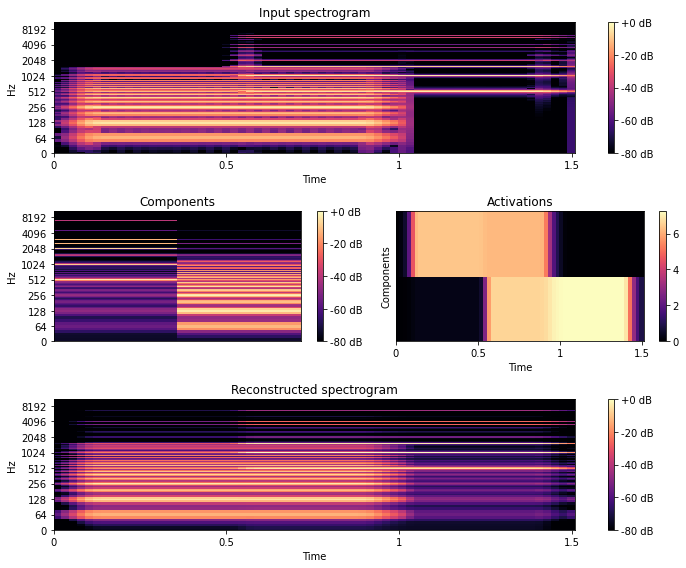

In [8]:
plt.figure(figsize=(10,8))

plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time')
plt.title('Input spectrogram')
plt.colorbar(format='%+2.0f dB')

plt.subplot(3, 2, 3)
librosa.display.specshow(librosa.amplitude_to_db(comps, ref=np.max), y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Components')

plt.subplot(3, 2, 4)
librosa.display.specshow(acts, x_axis='time')
plt.ylabel('Components')
plt.title('Activations')
plt.colorbar()

plt.subplot(3, 1, 3)
S_approx = comps.dot(acts)
librosa.display.specshow(librosa.amplitude_to_db(S_approx, ref=np.max), y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')

plt.title('Reconstructed spectrogram')
plt.tight_layout()
plt.show()

In [9]:
basis1 = np.dot(comps[: , 0].reshape(1025, 1), acts[0].reshape(1, 65))
basis2 = np.dot(comps[: , 1].reshape(1025, 1), acts[0].reshape(1, 65))

Separated sounds
----------------------

In [10]:
# trumpet
y1 = librosa.core.istft(basis1, length=len(y))
IPython.display.Audio(data=y1, rate=sr)

In [11]:
# tuba
y2 = librosa.core.istft(basis2, length=len(y))
IPython.display.Audio(data=y2, rate=sr)